**Importing Lib**

In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Data Preprocessing**

**Training Image Processing**

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70273 files belonging to 38 classes.


**Validation Image Processing**

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [4]:

training_set


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
validation_set


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[2.5000e+02 2.5000e+02 2.5000e+02]
   [2.5275e+02 2.5275e+02 2.5275e+02]
   [2.5450e+02 2.5450e+02 2.5450e+02]
   ...
   [2.5500e+02 2.5500e+02 2.5500e+02]
   [2.5500e+02 2.5500e+02 2.5500e+02]
   [2.5500e+02 2.5500e+02 2.5500e+02]]

  [[2.5125e+02 2.5125e+02 2.5125e+02]
   [2.5450e+02 2.5450e+02 2.5450e+02]
   [2.5450e+02 2.5450e+02 2.5450e+02]
   ...
   [2.5500e+02 2.5500e+02 2.5500e+02]
   [2.5500e+02 2.5500e+02 2.5500e+02]
   [2.5500e+02 2.5500e+02 2.5500e+02]]

  [[2.5475e+02 2.5475e+02 2.5475e+02]
   [2.5175e+02 2.5175e+02 2.5175e+02]
   [2.5125e+02 2.5125e+02 2.5125e+02]
   ...
   [2.5500e+02 2.5500e+02 2.5500e+02]
   [2.5500e+02 2.5500e+02 2.5500e+02]
   [2.5500e+02 2.5500e+02 2.5500e+02]]

  ...

  [[2.5500e+02 2.5500e+02 2.5500e+02]
   [2.5500e+02 2.5500e+02 2.5500e+02]
   [2.5500e+02 2.5500e+02 2.5500e+02]
   ...
   [2.5500e+02 2.5500e+02 2.5500e+02]
   [2.5500e+02 2.5500e+02 2.5500e+02]
   [2.5500e+02 2.5500e+02 2.5500e+02]]

  [[2.5500e+02 2.5500e+02 2.5500e+

**To avoid overshooting**
1. Choose small learning rate
2. To avoid underfitting , increase number of neuron
3. Add more convolution layer to extract more feature

## CNN

**Model Building**

In [7]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential 

In [8]:
model = Sequential()

Building Convolutional layer

In [9]:
model.add(Conv2D(filters =32,kernel_size = 3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters =32,kernel_size = 3,activation='relu'))
model.add(MaxPool2D(pool_size =2 ,strides=2))

C:\Users\91902\OneDrive\Desktop\Seminar\Crop Disease Prediciton\tfvenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [10]:
model.add(Conv2D(filters =64,kernel_size = 3,padding='same',activation='relu'))
model.add(Conv2D(filters =64,kernel_size = 3,activation='relu'))
model.add(MaxPool2D(pool_size =2 ,strides=2))

In [11]:
model.add(Conv2D(filters =128,kernel_size = 3,padding='same',activation='relu',))
model.add(Conv2D(filters =128,kernel_size = 3,activation='relu'))
model.add(MaxPool2D(pool_size =2 ,strides=2))

In [12]:
model.add(Conv2D(filters =256,kernel_size = 3,padding='same',activation='relu'))
model.add(Conv2D(filters =256,kernel_size = 3,activation='relu'))
model.add(MaxPool2D(pool_size =2 ,strides=2))

In [13]:
model.add(Conv2D(filters =512,kernel_size = 3,padding='same',activation='relu'))
model.add(Conv2D(filters =512,kernel_size = 3,activation='relu'))
model.add(MaxPool2D(pool_size =2 ,strides=2))

In [14]:
model.add(Dropout(0.25))

In [15]:

model.add(Flatten())

In [16]:
model.add(Dense(units=1500,activation='relu'))

In [17]:
model.add(Dropout(0.4))

In [18]:
#Output Layer

In [19]:


model.add(Dense(units=38,activation='softmax'))

**Compiling Model**

In [20]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

**Training Model**

In [22]:
 training_history = model.fit(x=training_set,validation_data = validation_set,epochs = 5)

Epoch 1/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1119s 508ms/step - accuracy: 0.3958 - loss: 2.1306 - val_accuracy: 0.8393 - val_loss: 0.4993
Epoch 2/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1431s 651ms/step - accuracy: 0.8437 - loss: 0.5027 - val_accuracy: 0.8816 - val_loss: 0.3596
Epoch 3/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1260s 574ms/step - accuracy: 0.9073 - loss: 0.2886 - val_accuracy: 0.9338 - val_loss: 0.2018
Epoch 4/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1193s 543ms/step - accuracy: 0.9356 - loss: 0.1923 - val_accuracy: 0.9395 - val_loss: 0.1829
Epoch 5/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1134s 516ms/step - accuracy: 0.9547 - loss: 0.1416 - val_accuracy: 0.9455 - val_loss: 0.1753


**Model Evalutation**

**Saving Model**

In [23]:
model.save("trained_model.keras")

In [24]:
training_history.history

{'accuracy': [0.6003870368003845,
  0.8649125695228577,
  0.9167959094047546,
  0.9405888319015503,
  0.9572666883468628],
 'loss': [1.3485875129699707,
  0.4298519492149353,
  0.25737372040748596,
  0.17905423045158386,
  0.13118329644203186],
 'val_accuracy': [0.839346706867218,
  0.8816298842430115,
  0.9337582588195801,
  0.9395060539245605,
  0.9454814195632935],
 'val_loss': [0.49929115176200867,
  0.3596426248550415,
  0.20176339149475098,
  0.18294104933738708,
  0.17534342408180237]}

In [25]:
import json
with open("training_history","w") as f:
    json.dump(training_history.history,f)

**Accuracy Visualization**

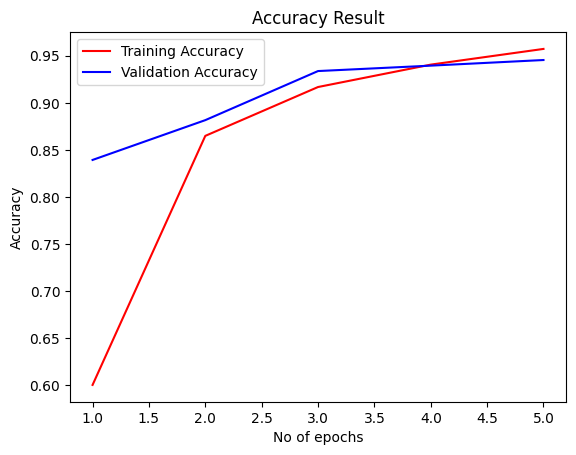

In [26]:
epochs = range(1, 6)  # Assuming you have 5 epochs
plt.plot(epochs, training_history.history['accuracy'][:5], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'][:5], color='blue', label='Validation Accuracy')
plt.xlabel("No of epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Result")
plt.legend()
plt.show()


In [27]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [28]:
 test_set = validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [29]:
y_pred = model.predict(test_set)
y_pred

550/550 ━━━━━━━━━━━━━━━━━━━━ 71s 129ms/step


array([[9.9997294e-01, 9.9446538e-07, 8.9546397e-09, ..., 9.6589133e-11,
        7.7192237e-12, 2.9474001e-10],
       [9.9853814e-01, 1.3086634e-03, 3.0104818e-08, ..., 3.5092770e-10,
        6.9456990e-10, 1.6117912e-08],
       [9.9999952e-01, 3.9793566e-08, 7.5095707e-10, ..., 4.4497292e-15,
        6.1544004e-14, 8.1614012e-12],
       ...,
       [1.7790998e-09, 2.5809995e-11, 6.1258767e-08, ..., 2.1523321e-10,
        1.8882104e-10, 9.9999738e-01],
       [2.8734710e-09, 3.9755983e-11, 1.6218110e-08, ..., 4.3004936e-10,
        2.8933009e-10, 9.9999654e-01],
       [6.7643426e-11, 6.6596078e-12, 6.4538423e-11, ..., 1.1388054e-12,
        1.8337437e-11, 9.9998093e-01]], dtype=float32)

In [30]:
y_pred.shape

(17572, 38)

In [31]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [32]:
true_categories = tf.concat([y for x,y in test_set], axis= 0 )
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [33]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.92      0.94       504
                                 Apple___Black_rot       0.97      0.98      0.97       497
                          Apple___Cedar_apple_rust       0.92      0.98      0.95       440
                                   Apple___healthy       0.92      0.94      0.93       502
                               Blueberry___healthy       0.97      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.95      0.97       421
                 Cherry_(including_sour)___healthy       0.98      0.97      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.90      0.92       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.96      0.

In [36]:
cm=confusion_matrix(Y_true,predicted_categories)
cm.shape

(38, 38)

**Confusion Matrix**

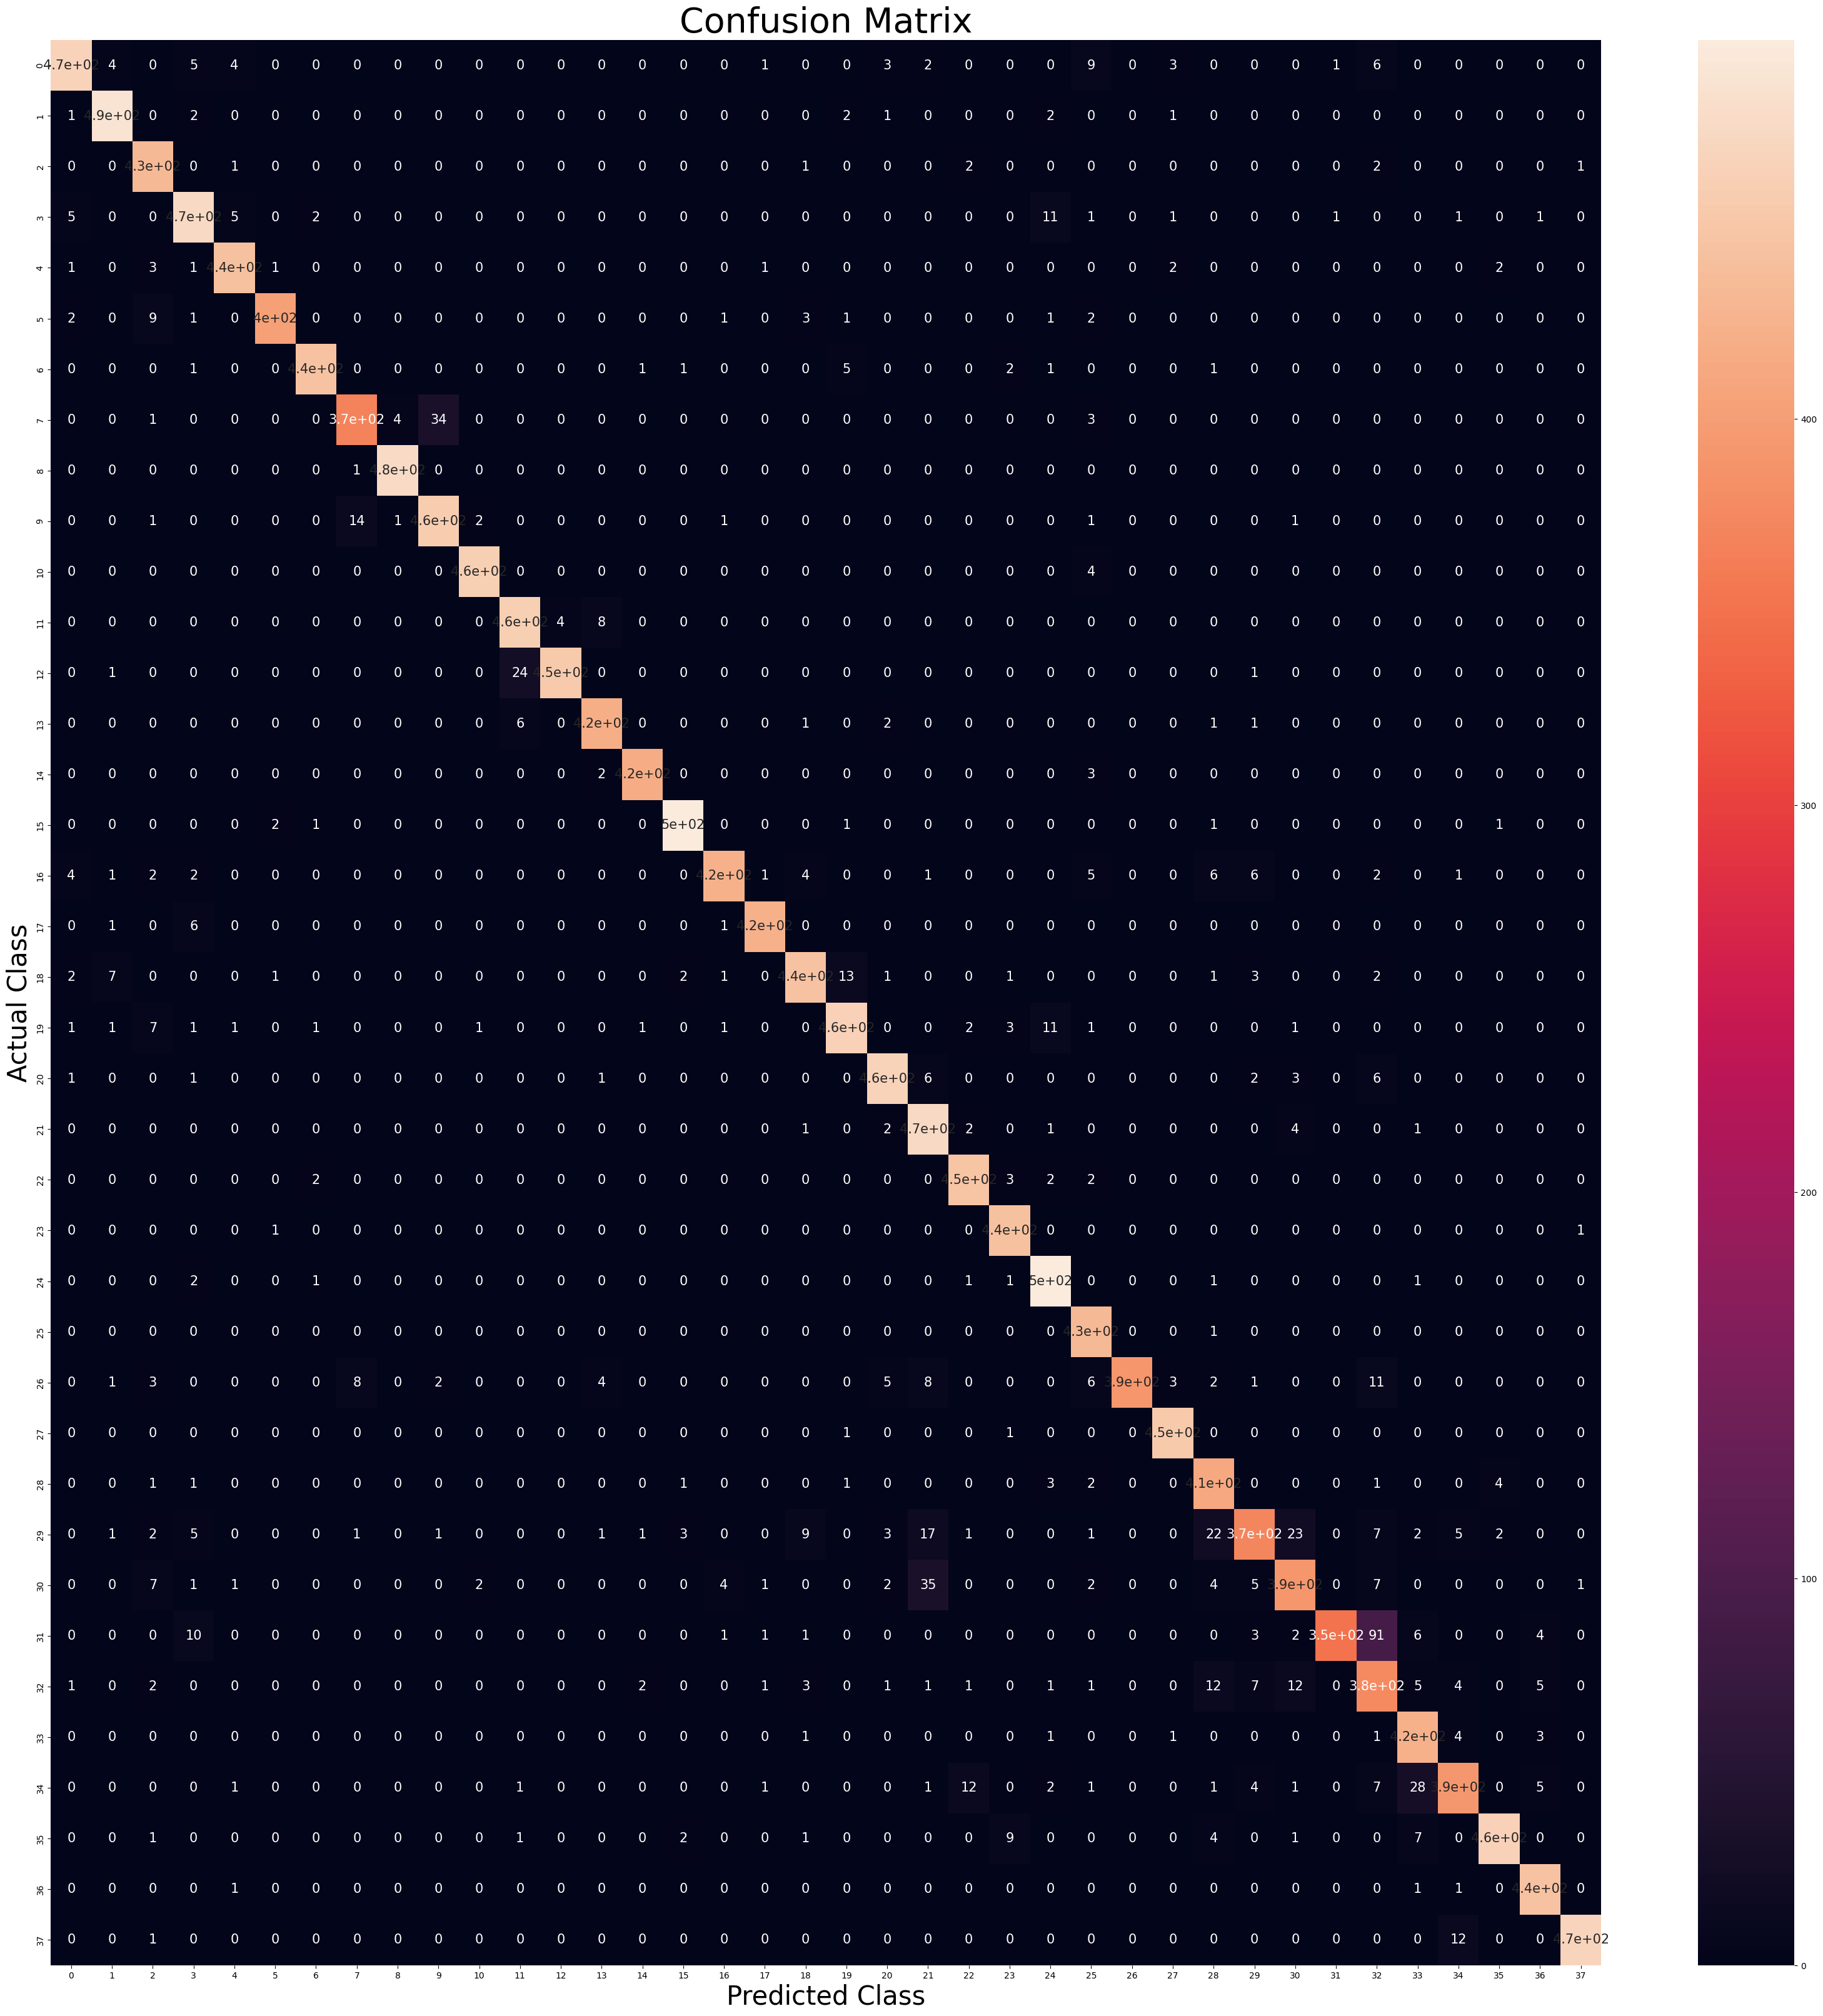

In [37]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot = True,annot_kws={'size':15}) # annot = if true write the data value in each cell
plt.xlabel("Predicted Class",fontsize = 30)
plt.ylabel("Actual Class",fontsize = 30)
plt.title("Confusion Matrix",fontsize = 40)
plt.show()

In [50]:
# train_features = model.predict(training_set)
# val_features = model.predict(validation_set)

## Feedforward Neural Network (FNN)

Epoch 1/20


C:\Users\91902\OneDrive\Desktop\Seminar\Crop Disease Prediciton\tfvenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5895 - loss: 0.6793 - val_accuracy: 0.5000 - val_loss: 0.6921
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5622 - loss: 0.6726 - val_accuracy: 0.5000 - val_loss: 0.6959
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5789 - loss: 0.6729 - val_accuracy: 0.5000 - val_loss: 0.7029
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5966 - loss: 0.6513 - val_accuracy: 0.5000 - val_loss: 0.7057
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5898 - loss: 0.6604 - val_accuracy: 0.5000 - val_loss: 0.7101
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6011 - loss: 0.6611 - val_accuracy: 0.5000 - val_loss: 0.7143
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6143 - loss: 0.6544 - val_accuracy: 0.5000 - val_loss: 0.7141
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6425 - loss: 0.6478 - val_accuracy: 0.5000 - val_loss: 0.7187
Epoch 9/20
4/4 ━━━

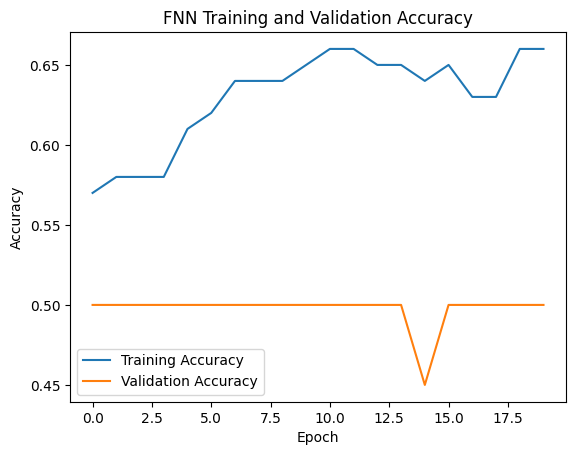

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score

train_features = np.random.rand(100, 10)  
train_labels = np.random.randint(0, 2, size=(100,))  
val_features = np.random.rand(20, 10) 
val_labels = np.random.randint(0, 2, size=(20,)) 

input_shape = train_features.shape[1:]
num_classes = len(np.unique(train_labels))


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),  
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dense(num_classes, activation='softmax') 
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history = model.fit(train_features, train_labels, epochs=20, validation_data=(val_features, val_labels))


train_predictions = model.predict(train_features)
val_predictions = model.predict(val_features)

train_accuracy = accuracy_score(train_labels, np.argmax(train_predictions, axis=1))
val_accuracy = accuracy_score(val_labels, np.argmax(val_predictions, axis=1))




plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('FNN Training and Validation Accuracy')
plt.legend()
plt.show()


In [55]:
print("FNN Training Accuracy:", train_accuracy)
print("FNN Validation Accuracy:", val_accuracy)

FNN Training Accuracy: 0.65
FNN Validation Accuracy: 0.5


In [41]:
print("Classification Report for Training Set:")
print(classification_report(train_labels, np.argmax(train_predictions, axis=1)))

print("Classification Report for Validation Set:")
print(classification_report(val_labels, np.argmax(val_predictions, axis=1)))

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.53      0.75      0.62        48
           1       0.62      0.38      0.48        52

    accuracy                           0.56       100
   macro avg       0.58      0.57      0.55       100
weighted avg       0.58      0.56      0.55       100

Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.54      0.88      0.67         8
           1       0.86      0.50      0.63        12

    accuracy                           0.65        20
   macro avg       0.70      0.69      0.65        20
weighted avg       0.73      0.65      0.65        20




## KNN


Training Accuracy: 0.79
Validation Accuracy: 0.35


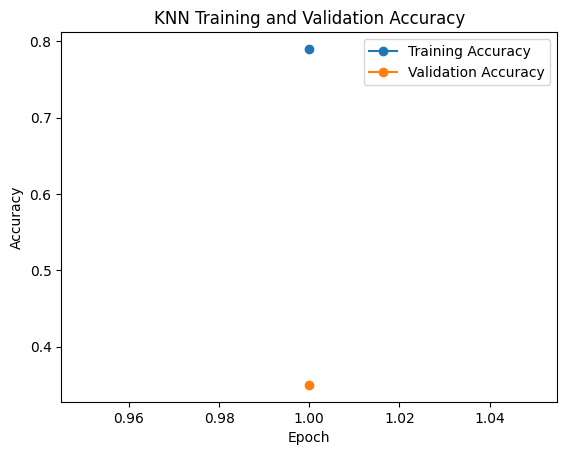

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Generating random data similar to the TensorFlow example
train_features = np.random.rand(100, 10)
train_labels = np.random.randint(0, 2, size=(100,))
val_features = np.random.rand(20, 10)
val_labels = np.random.randint(0, 2, size=(20,))

# Creating KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors here

# Fitting the model
knn_model.fit(train_features, train_labels)

# Making predictions
train_predictions = knn_model.predict(train_features)
val_predictions = knn_model.predict(val_features)

# Calculating accuracies
train_accuracy = accuracy_score(train_labels, train_predictions)
val_accuracy = accuracy_score(val_labels, val_predictions)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Plotting accuracy over epochs (in this case, it's just one point for KNN)
plt.plot([1], [train_accuracy], marker='o', label='Training Accuracy')
plt.plot([1], [val_accuracy], marker='o', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('KNN Training and Validation Accuracy')
plt.legend()
plt.show()


## DECISION TREE

Training Accuracy: 0.97
Validation Accuracy: 0.6


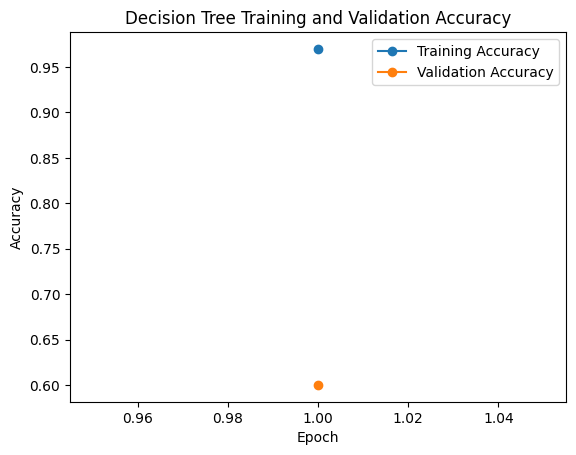

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Generating random data similar to the TensorFlow example
train_features = np.random.rand(100, 10)
train_labels = np.random.randint(0, 2, size=(100,))
val_features = np.random.rand(20, 10)
val_labels = np.random.randint(0, 2, size=(20,))

# Creating Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=10)

# Fitting the model
tree_model.fit(train_features, train_labels)

# Making predictions
train_predictions = tree_model.predict(train_features)
val_predictions = tree_model.predict(val_features)

# Calculating accuracies
train_accuracy = accuracy_score(train_labels, train_predictions)
val_accuracy = accuracy_score(val_labels, val_predictions)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Plotting accuracy (in this case, it's just one point for Decision Tree)
plt.plot([1], [train_accuracy], marker='o', label='Training Accuracy')
plt.plot([1], [val_accuracy], marker='o', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Decision Tree Training and Validation Accuracy')
plt.legend()
plt.show()


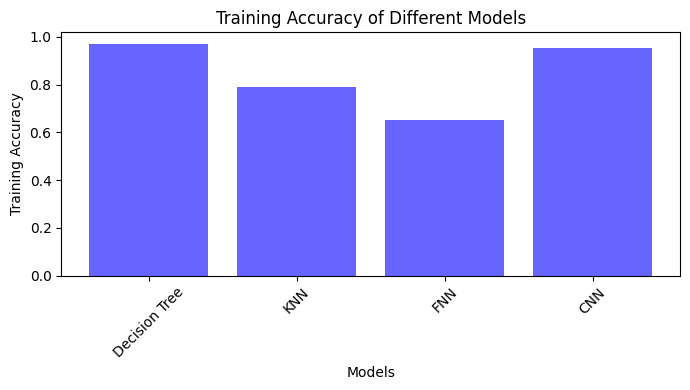

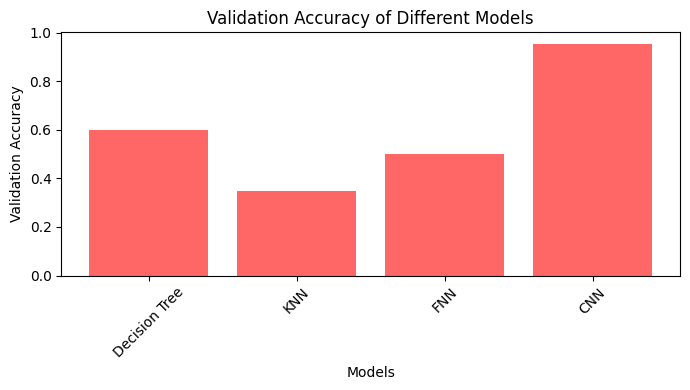

In [60]:
import matplotlib.pyplot as plt


models = ['Decision Tree', 'KNN', 'FNN', 'CNN']
training_accuracies = [0.97, 0.79, 0.65, 0.9519]
validation_accuracies = [0.6, 0.35, 0.5, 0.9539]

plt.figure(figsize=(7, 4))
plt.bar(models, training_accuracies, color='b', alpha=0.6)
plt.xlabel('Models')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy of Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
plt.bar(models, validation_accuracies, color='r', alpha=0.6)
plt.xlabel('Models')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy of Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## FNN 2

In [61]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

C:\Users\91902\OneDrive\Desktop\Seminar\Crop Disease Prediciton\tfvenv\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 415s 187ms/step - accuracy: 0.0289 - loss: 467.7012 - val_accuracy: 0.0287 - val_loss: 3.6361
Epoch 2/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 366s 166ms/step - accuracy: 0.0284 - loss: 3.6364 - val_accuracy: 0.0287 - val_loss: 3.6360
Epoch 3/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 374s 170ms/step - accuracy: 0.0269 - loss: 3.6365 - val_accuracy: 0.0287 - val_loss: 3.6360
Epoch 4/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 369s 168ms/step - accuracy: 0.0272 - loss: 3.6363 - val_accuracy: 0.0287 - val_loss: 3.6361
Epoch 5/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 360s 164ms/step - accuracy: 0.0265 - loss: 3.6368 - val_accuracy: 0.0287 - val_loss: 3.6360
550/550 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step
Classification Report for FNN Model:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       504
           1       0.00      0.00      0.00       497
           2       0.00      0.00      0.00       440
           3       0.00      0.00    

C:\Users\91902\OneDrive\Desktop\Seminar\Crop Disease Prediciton\tfvenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91902\OneDrive\Desktop\Seminar\Crop Disease Prediciton\tfvenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91902\OneDrive\Desktop\Seminar\Crop Disease Prediciton\tfvenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

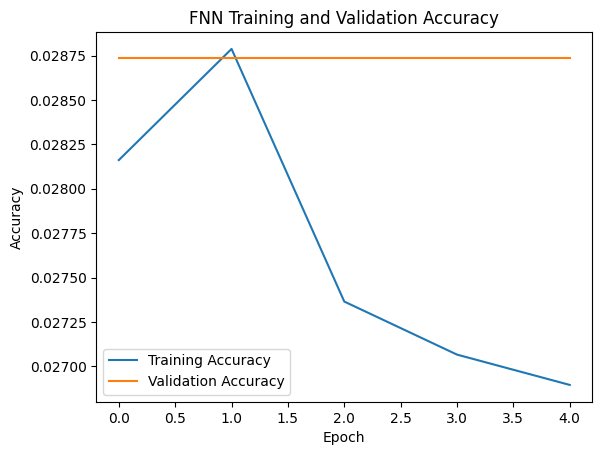

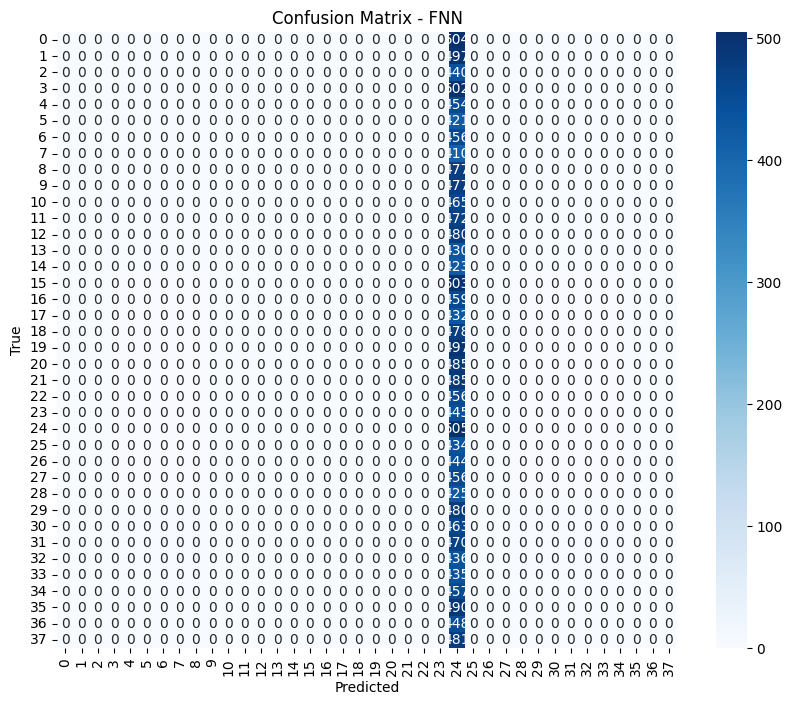

In [64]:
X_train = []
y_train = []
for images, labels in training_set:
    for image, label in zip(images, labels):
        X_train.append(image.numpy().flatten())
        y_train.append(label.numpy())
X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = []
y_val = []
for images, labels in validation_set:
    for image, label in zip(images, labels):
        X_val.append(image.numpy().flatten())
        y_val.append(label.numpy())
X_val = np.array(X_val)
y_val = np.array(y_val)


model_fnn = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(128 * 128 * 3,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(38, activation='softmax')
])


model_fnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


training_history_fnn = model_fnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5)


y_pred_fnn = model_fnn.predict(X_val)
predicted_categories_fnn = tf.argmax(y_pred_fnn, axis=1)
true_categories_fnn = tf.argmax(y_val, axis=1)

print("Classification Report for FNN Model:")
print(classification_report(true_categories_fnn, predicted_categories_fnn))


plt.plot(training_history_fnn.history['accuracy'], label='Training Accuracy')
plt.plot(training_history_fnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('FNN Training and Validation Accuracy')
plt.legend()
plt.show()


cm_fnn = confusion_matrix(true_categories_fnn, predicted_categories_fnn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fnn, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - FNN')
plt.show()

Found 70273 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.
Class Names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 

C:\Users\91902\OneDrive\Desktop\Seminar\Crop Disease Prediciton\tfvenv\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 412s 186ms/step - accuracy: 0.0276 - loss: 509.0612 - val_accuracy: 0.0286 - val_loss: 3.6361
Epoch 2/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 423s 192ms/step - accuracy: 0.0290 - loss: 3.6363 - val_accuracy: 0.0287 - val_loss: 3.6360
Epoch 3/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 404s 184ms/step - accuracy: 0.0280 - loss: 3.6362 - val_accuracy: 0.0287 - val_loss: 3.6360
Epoch 4/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 354s 161ms/step - accuracy: 0.0273 - loss: 3.6365 - val_accuracy: 0.0287 - val_loss: 3.6360
Epoch 5/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 357s 163ms/step - accuracy: 0.0282 - loss: 3.6365 - val_accuracy: 0.0287 - val_loss: 3.6360
550/550 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step
Classification Report for FNN Model:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       504
           1       0.00      0.00      0.00       497
           2       0.00      0.00      0.00       440
           3       0.00      0.00    

C:\Users\91902\OneDrive\Desktop\Seminar\Crop Disease Prediciton\tfvenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91902\OneDrive\Desktop\Seminar\Crop Disease Prediciton\tfvenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91902\OneDrive\Desktop\Seminar\Crop Disease Prediciton\tfvenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

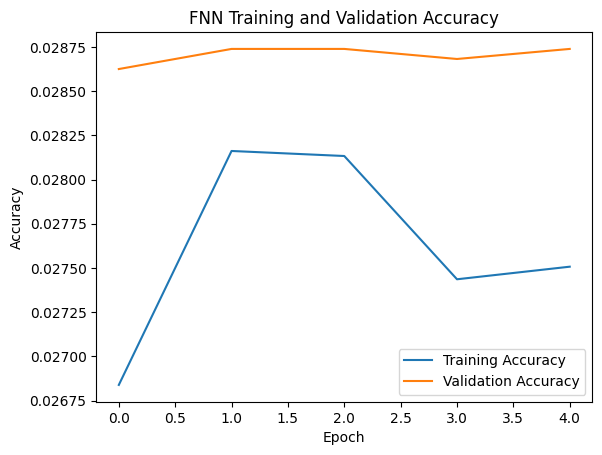

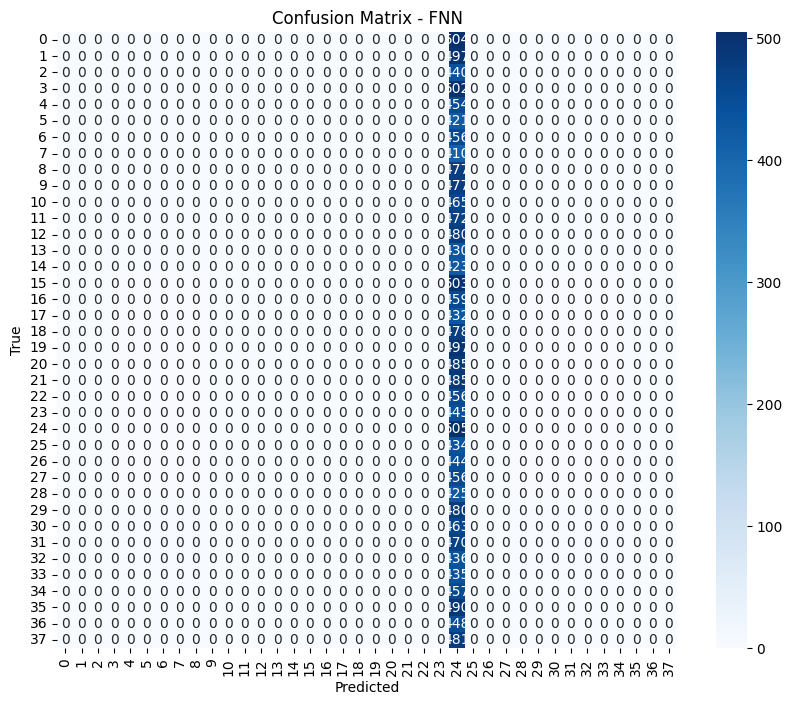

In [39]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


image_size = (128, 128)
batch_size = 32


train_directory = 'train'
train_data = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=42,
)


valid_directory = 'valid'
valid_data = tf.keras.utils.image_dataset_from_directory(
    valid_directory,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=batch_size,
    image_size=image_size,
    shuffle=False,  # No need to shuffle validation data
)


class_names = train_data.class_names
print("Class Names:", class_names)


AUTOTUNE = tf.data.experimental.AUTOTUNE
train_data = train_data.prefetch(buffer_size=AUTOTUNE)
valid_data = valid_data.prefetch(buffer_size=AUTOTUNE)


X_train, y_train = [], []
for images, labels in train_data:
    for image, label in zip(images, labels):
        X_train.append(image.numpy().flatten())
        y_train.append(label.numpy())
X_train = np.array(X_train)
y_train = np.array(y_train)

X_val, y_val = [], []
for images, labels in valid_data:
    for image, label in zip(images, labels):
        X_val.append(image.numpy().flatten())
        y_val.append(label.numpy())
X_val = np.array(X_val)
y_val = np.array(y_val)


model_fnn = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(128 * 128 * 3,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(38, activation='softmax')
])


model_fnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
training_history_fnn = model_fnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5)

# Generate classification report
y_pred_fnn = model_fnn.predict(X_val)
predicted_categories_fnn = tf.argmax(y_pred_fnn, axis=1)
true_categories_fnn = tf.argmax(y_val, axis=1)

print("Classification Report for FNN Model:")
print(classification_report(true_categories_fnn, predicted_categories_fnn))


plt.plot(training_history_fnn.history['accuracy'], label='Training Accuracy')
plt.plot(training_history_fnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('FNN Training and Validation Accuracy')
plt.legend()
plt.show()


cm_fnn = confusion_matrix(true_categories_fnn, predicted_categories_fnn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fnn, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - FNN')
plt.show()


## Decision Tree